<a href="https://colab.research.google.com/github/Yuma-Ichikawa/visualization_python/blob/main/errorbar_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PythonでErrorbarつきのグラフを作成する

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### errorbarの引数


*   x : x軸の値
*   y : y軸の値
*   xerr : x軸の各値に対する誤差
*   yerr : y軸の各値に対する誤差
*   ecolor : エラーバーの色
*   capsize : エラーバーの横線の長さ
*   fmt : 各点のマーカの種類

In [44]:
# 真の値(観測者は未知)
x = np.array([0, 1, 2, 3, 4, 5])
y = x

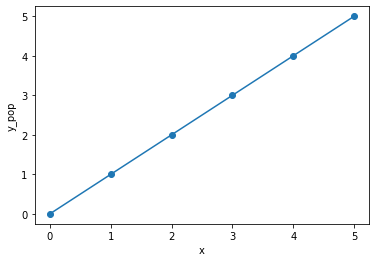

In [50]:
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y_pop')
plt.show()

In [45]:
# 誤差の値
xerr = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
yerr = np.array([0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

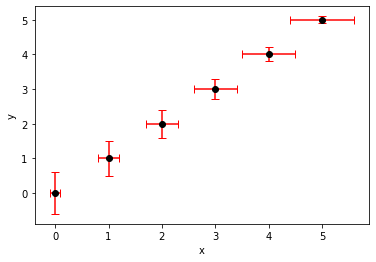

In [76]:
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=xerr, yerr=yerr, capsize=4, fmt='o', ecolor='red', color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## 各点の観測点を仮想的に作る

各点の真の値に、ガウスノイズを加えることで仮想的に観測値の誤差を再現する。


In [72]:
y_obs = np.zeros((10, 6))
for i in range(10):
    y_obs[i, 0] = x[0] + np.random.rand()
    y_obs[i, 1] = x[1] + np.random.rand()
    y_obs[i, 2] = x[2] + np.random.rand()
    y_obs[i, 3] = x[3] + np.random.rand()
    y_obs[i, 4] = x[4] + np.random.rand()
    y_obs[i, 5] = x[5] + np.random.rand()

data = pd.DataFrame(y_obs, index=[f'観測値{i}' for i in range(1, 11)])
data

,0,1,2,3,4,5
観測値1,0.474999,1.792972,2.861497,3.566244,4.424141,5.790977
観測値2,0.620454,1.270816,2.377342,3.607985,4.247639,5.602286
観測値3,0.933140,1.363218,2.606142,3.052352,4.398530,5.043758
観測値4,0.395285,1.781431,2.446073,3.277021,4.186398,5.318495
観測値5,0.670402,1.252782,2.927352,3.554647,4.662981,5.834659
観測値6,0.730515,1.293603,2.828827,3.439353,4.234921,5.041822
観測値7,0.501187,1.026021,2.600321,3.280937,4.467154,5.435941
観測値8,0.027809,1.306721,2.975929,3.120647,4.073994,5.608467
観測値9,0.599547,1.633243,2.001286,3.074995,4.606126,5.585030
観測値10,0.817481,1.319881,2.009424,3.958130,4.901822,5.091508


In [64]:
# データの範囲
data.max() - data.min()

0    0.878707
1    0.963135
2    0.829554
3    0.836744
4    0.775076
5    0.702056
dtype: float64

In [65]:
# 標準偏差
data.std()

0    0.292589
1    0.399725
2    0.299716
3    0.307299
4    0.283979
5    0.238467
dtype: float64

In [66]:
# 標準誤差
data.std() / np.sqrt(len(data))

0    0.092525
1    0.126404
2    0.094778
3    0.097176
4    0.089802
5    0.075410
dtype: float64

In [67]:
# それぞれの誤差をまとめる
yerr_scope = np.array(data.max() - data.min())
yerr_sd = np.array(data.std()) 
yerr_se = np.array(data.std() / np.sqrt(len(data)))

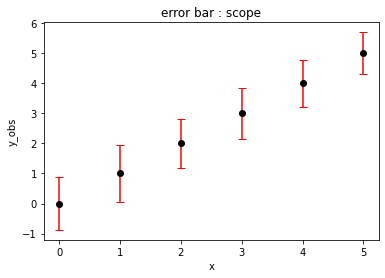

In [78]:
# 各点を平均値とする
y_mean = np.array(data.mean())

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr_scope, capsize=4, fmt='o', ecolor='red', color='black')
ax.set_xlabel('x')
ax.set_ylabel('y_obs')
ax.set_title('error bar : scope')
plt.show()

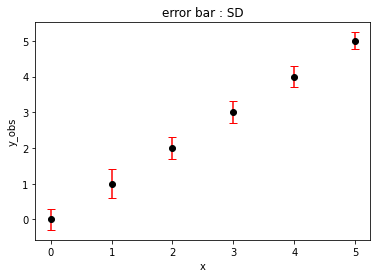

In [80]:
# 各点を平均値とする
y_mean = np.array(data.mean())

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr_sd, capsize=4, fmt='o', ecolor='red', color='black')
ax.set_xlabel('x')
ax.set_ylabel('y_obs')
ax.set_title('error bar : SD')
plt.show()

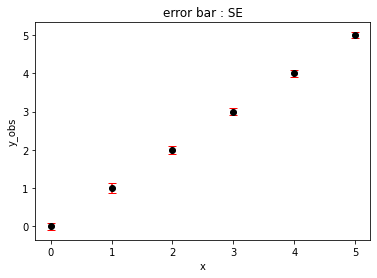

In [81]:
# 各点を平均値とする
y_mean = np.array(data.mean())

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr_se, capsize=4, fmt='o', ecolor='red', color='black')
ax.set_xlabel('x')
ax.set_ylabel('y_obs')
ax.set_title('error bar : SE')
plt.show()